In [14]:
import numpy
import matplotlib.pyplot as plt

from tslearn.barycenters import \
    euclidean_barycenter, \
    dtw_barycenter_averaging, \
    dtw_barycenter_averaging_subgradient, \
    softdtw_barycenter
from tslearn.utils import to_time_series_dataset
from tslearn.datasets import CachedDatasets

In [16]:
import pandas as pd
df=pd.read_csv("/Users/pinheirochagas/Desktop/math.csv", sep=',',header=None)
X = to_time_series_dataset(df.values)
print(X.shape)
length_of_sequence = X.shape[1]
print(length_of_sequence)

(164, 4501, 1)
4501


/Users/pinheirochagas/anaconda3/envs/mne/lib/python3.8/site-packages/tslearn/barycenters/dba.py:735: ConvergenceWarning: DBA loss is increasing while it should not be. Stopping optimization.
  warnings.warn("DBA loss is increasing while it should not be. "


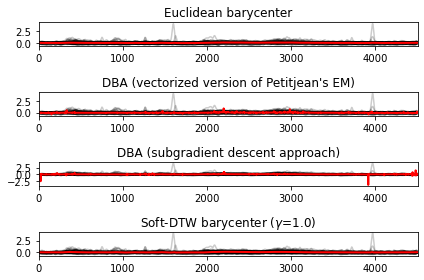

In [17]:
def plot_helper(barycenter):
    # plot all points of the data set
    for series in X:
        plt.plot(series.ravel(), "k-", alpha=.2)
    # plot the given barycenter of them
    plt.plot(barycenter.ravel(), "r-", linewidth=2)


# plot the four variants with the same number of iterations and a tolerance of
# 1e-3 where applicable
ax1 = plt.subplot(4, 1, 1)
plt.title("Euclidean barycenter")
plot_helper(euclidean_barycenter(X))

plt.subplot(4, 1, 2, sharex=ax1)
plt.title("DBA (vectorized version of Petitjean's EM)")
plot_helper(dtw_barycenter_averaging(X, max_iter=50, tol=1e-3))

plt.subplot(4, 1, 3, sharex=ax1)
plt.title("DBA (subgradient descent approach)")
plot_helper(dtw_barycenter_averaging_subgradient(X, max_iter=50, tol=1e-3))

plt.subplot(4, 1, 4, sharex=ax1)
plt.title("Soft-DTW barycenter ($\gamma$=1.0)")
plot_helper(softdtw_barycenter(X, gamma=1., max_iter=50, tol=1e-3))

# clip the axes for better readability
ax1.set_xlim([0, length_of_sequence])

# show the plot(s)
plt.tight_layout()
plt.show()

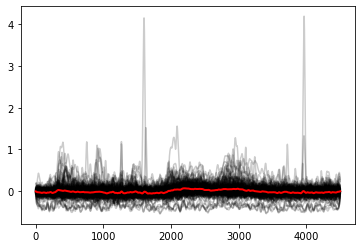

In [18]:
plot_helper(euclidean_barycenter(X))


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data)